<a href="https://colab.research.google.com/github/strangelycutlemon/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [6]:
# TODO - your code!
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
namelist = ['Class Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending','superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
df = pd.read_csv(url, names=namelist, na_values=np.NaN)
df = df.replace({'?':np.NaN, 'n':0, 'y':1})
df.rename(columns={'Class Name':'Party'},inplace=True)
rep = df[df.Party == 'republican']
dem = df[df.Party == 'democrat']
df.head()

,Party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
from scipy import stats

dem_set = dem['adoption-of-the-budget-resolution']
rep_set = rep['adoption-of-the-budget-resolution']

# Trying to write this without looking at Ryan's code.
def confidence_interval(data, confidence_level=.95, trim_unit=False):
  data = np.array(data)[~np.isnan(data)]
  n = len(data)
  sample_mean = np.mean(data)
  sample_std = np.std(data, ddof=n-1)
  std_error = sample_std / n**0.5
  # Here I paused for a long time trying to understand scipy.stats.t.ppf
  margin_of_error = std_error * stats.t.ppf((1 + confidence_level) / 2.0, n - 1)
  lower_bound = sample_mean - margin_of_error
  upper_bound = sample_mean + margin_of_error
  # Optional: trims confidence interval to valid 0-1 range.
  # 0 and 1 not used because they don't plot properly.
  if trim_unit == True:
    if lower_bound <= 0:
      lower_bound = 0.0001
    if upper_bound >= 1:
      upper_bound = 0.9999
  # print(margin_of_error, std_error, n, sample_mean, stats.t.ppf((confidence_level / 2.0), n - 1))
  return (sample_mean, lower_bound, upper_bound)
  

In [101]:
confidence_interval(dem_set, trim_unit=True)

(0.8884615384615384, 0.268572621507179, 0.9999)

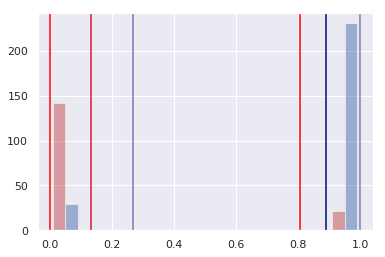

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# set numpy to ignore errors
np.seterr(divide='ignore', invalid='ignore')


fig, ax = plt.subplots()
plt.hist([rep_set, dem_set], color=['r', 'b'], alpha=0.5)

CI = confidence_interval(rep_set, trim_unit=True)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='crimson')

CI = confidence_interval(dem_set, trim_unit=True)
plt.axvline(x=CI[1], color='m')
plt.axvline(x=CI[2], color='m')
plt.axvline(x=CI[0], color='navy');


In [0]:
def question_plot(question, confidence_level=.95, trim_unit=False):
  dem_set = dem[str(question)]
  rep_set = rep[str(question)]
  dem_ci = confidence_interval(dem_set, confidence_level=0.95, trim_unit=True)
  rep_ci = confidence_interval(rep_set, confidence_level=0.95, trim_unit=True)
  
  fig, ax = plt.subplots()
  plt.title(question)
  plt.hist([rep_set, dem_set], color=['r', 'b'], alpha=0.5)
  plt.axvline(x=rep_ci[1], color='red', alpha=0.6)
  plt.axvline(x=rep_ci[2], color='red', alpha=0.6)
  plt.axvline(x=rep_ci[0], color='crimson')

  CI = confidence_interval(dem_set, trim_unit=True)
  plt.axvline(x=dem_ci[1], color='m', alpha=0.6)
  plt.axvline(x=dem_ci[2], color='m', alpha=0.6)
  plt.axvline(x=dem_ci[0], color='navy');

  return abs(dem_ci[0] - rep_ci[0])


In [0]:
def question_spread(question, confidence_level=.95, trim_unit=False):
  dem_set = dem[str(question)]
  rep_set = rep[str(question)]
  dem_ci = confidence_interval(dem_set, confidence_level=0.95, trim_unit=True)
  rep_ci = confidence_interval(rep_set, confidence_level=0.95, trim_unit=True)

  return abs(dem_ci[0] - rep_ci[0])


0.41677237491190977

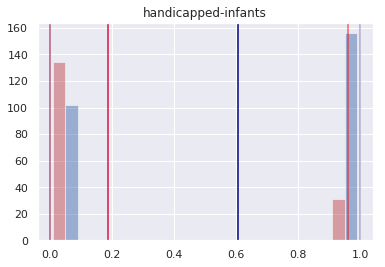

In [116]:
question_plot('handicapped-infants')

# **Both confidence intervals span 0 to 1! Maybe that indicates that both parties were divided on the issue of handicapped infants.**

In [117]:
ct = pd.crosstab(df['handicapped-infants'], df['Party'])
ct

Party,democrat,republican
handicapped-infants,,
0.0,102,134
1.0,156,31


# Not quite. Republicans tended to vote no.

# Perhaps a better interpretation is: There is insufficient data to estimate the population mean.

## Here we iterate through every issue.

## 1. indicate the most divisive issue

## 2. Plot all the confidence intervals along with a bar plot of votes from both parties.


physician-fee-freeze is the most divisive bill with a 0.9338247338247339 spread.


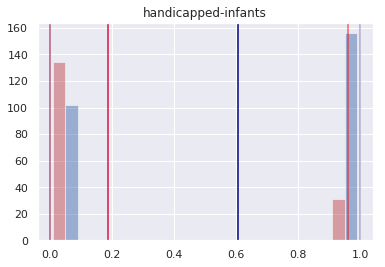

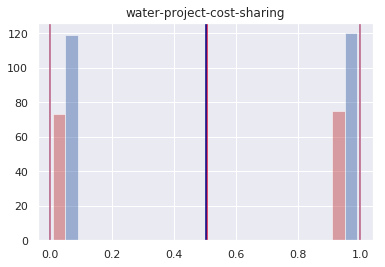

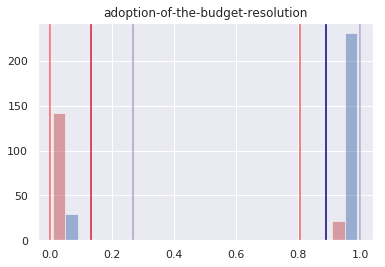

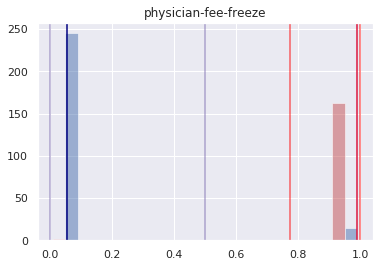

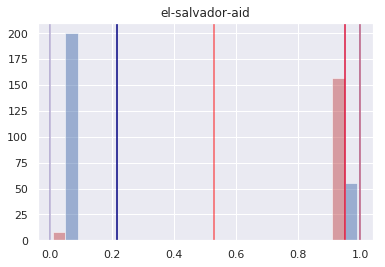

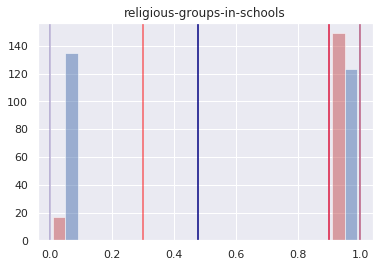

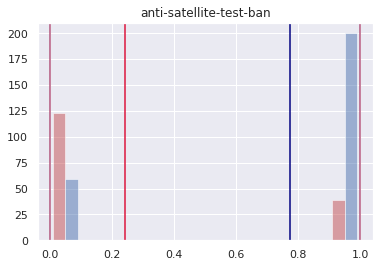

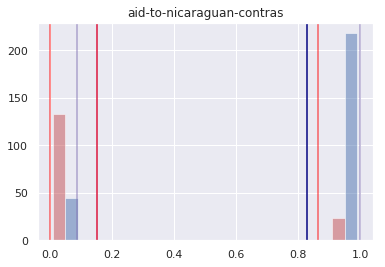

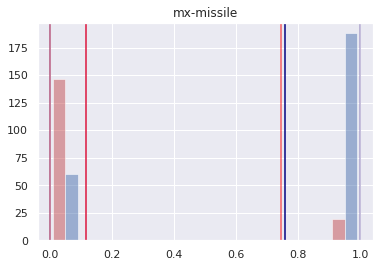

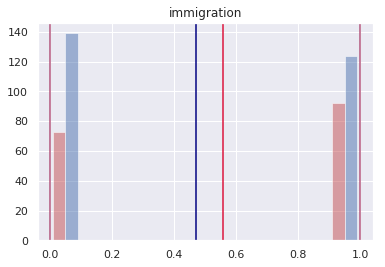

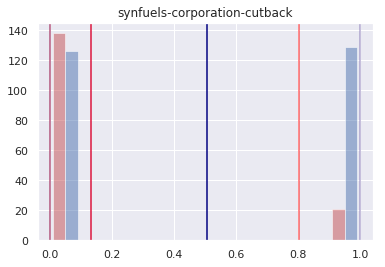

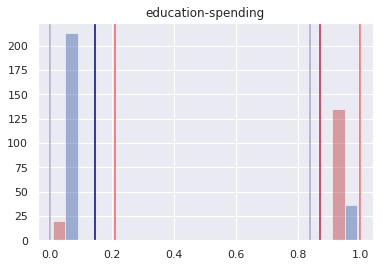

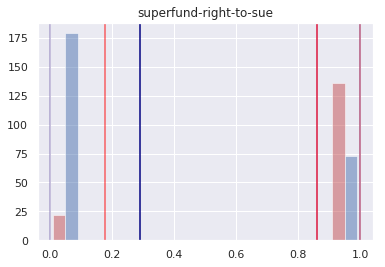

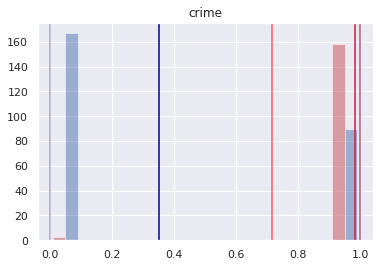

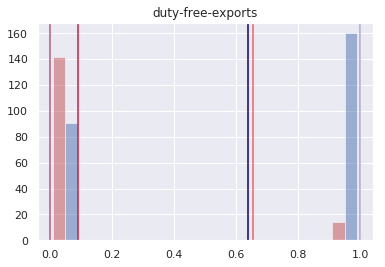

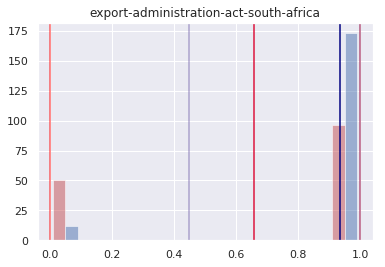

In [118]:
top = ''
largest_divide = 0
for q in df.columns[1:]:
  result = question_plot(q)
  # print(result, largest_divide)
  if result > largest_divide:
    largest_divide = result
    top = q
print(f"{top} is the most divisive bill with a {largest_divide} spread.")

## Summary

My key takeaway from this exercise was that we can seldom make useful estimations of the population mean among republicans and democrats based on congressional voting records. In most cases, the confidence interval spans the entire space of possible averages. There simply isn't enough data. The only issues where the confidence interval bounds appeared near the middle were on "physician-fee-freeze" and "export-administration-act-south-africa". A case could also be made for "adoption of the budget resolution".

I could be wrong. An alternative explanation for these results is just that student's t-distribution is not good enough to find confidence intervals over binomial distributions. But I haven't found evidence of that online.

In [119]:
persons_data_url = "https://raw.githubusercontent.com/strangelycutlemon/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv"
persons_data = pd.read_csv(persons_data_url)
persons_data.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [124]:
persons_data.dtypes

Unnamed: 0       int64
age              int64
weight           int64
exercise_time    int64
dtype: object

In [0]:
age_bins = pd.cut(persons_data['age'], 8)
weight_bins = pd.cut(persons_data['weight'], 5)
et_bins = pd.cut(persons_data['exercise_time'], 20)

In [131]:
# # Sorting to avoid a crosstab bug
# df = df.sort_values(by='weight', ascending=True)

observed = pd.crosstab(persons_data['age'], persons_data['weight']).values
observed.shape

(63, 143)

In [132]:
contingency_table = pd.crosstab(df['age'], df['weight'], margins=True)

contingency_table

KeyError: ignored

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)